In [1]:
import numpy as np
from signal_processing_utilities import process_signal
from glob import glob
from scipy.signal import lfilter, butter
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")
import scipy

In [2]:
data_dir = "../../data/"
data_dir_l = glob(data_dir + "*.wav")
current_file = data_dir_l[0]
current_file

'../../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav'

In [3]:
sample_rate, data = wavfile.read(current_file)

In [4]:
data_df = pd.DataFrame(data)
data_df.columns = ["Amplitude"]

In [5]:
preprocessed_signal = process_signal.preprocess_signal(
    raw_neural_signal=data, sample_rate=sample_rate
)

In [6]:
preprocessed_signal_df = pd.DataFrame(preprocessed_signal, columns=["Amplitude"])

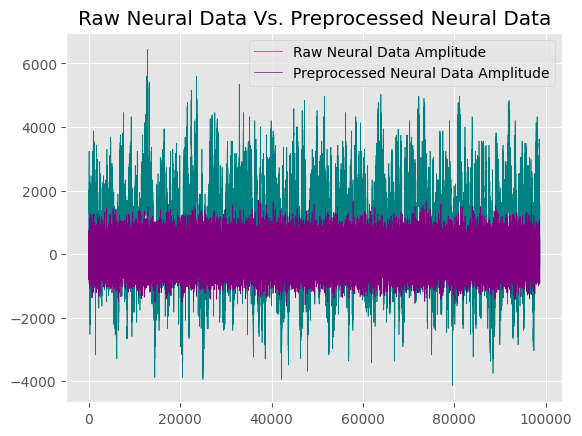

In [7]:
plt.plot(data_df, linewidth=0.5, color="teal", label=["Raw Neural Data Amplitude"])
plt.plot(
    preprocessed_signal,
    linewidth=0.5,
    color="purple",
    label=["Preprocessed Neural Data Amplitude"],
)
plt.legend()
plt.grid(True)
plt.title("Raw Neural Data Vs. Preprocessed Neural Data")
plt.show()

## Preprocessed Signal


In [8]:
raw_neural_signal = data_df["Amplitude"].values

In [9]:
# Detrending the signal
detrended_neural_data = np.int16(scipy.signal.detrend(raw_neural_signal))

In [10]:
# Band-pass Filter
nyq = sample_rate // 2
low_cutoff_freq = 500
high_cutoff_freq = 5000
low = low_cutoff_freq / nyq
high = high_cutoff_freq / nyq
order = 4
numerator, denominator = butter(order, [low, high], btype="band")

filtered_data_bandpass = np.int16(
    lfilter(numerator, denominator, detrended_neural_data)
)

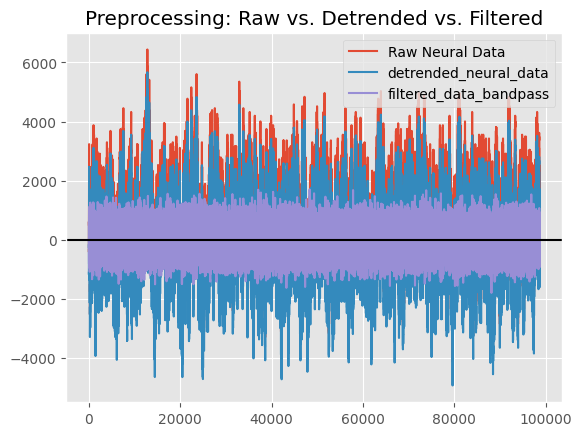

In [11]:
plt.title("Preprocessing: Raw vs. Detrended vs. Filtered")
plt.plot(data_df, label="Raw Neural Data")
plt.plot(detrended_neural_data, label="detrended_neural_data")
plt.plot(filtered_data_bandpass, label="filtered_data_bandpass")
plt.axhline(y=0, color="black")
plt.legend()
plt.show()